# Twitter Analysis

The goal of this notebook is to find relationships that reveal connections between twitter content and the external world. 







## Install 

In [ ]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

#NLP
!pip install vadersentiment

## Get Tweets

In [12]:
from bs4 import BeautifulSoup
from selenium import webdriver
import numpy as np
import sys
import time

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.implicitly_wait(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


In [4]:
#This is the Svg path that signifies the tweet is a retweet
retweet_path = "M23.615 15.477c-.47-.47-1.23-.47-1.697 0l-1.326 1.326V7.4c0-2.178-1.772-3.95-3.95-3.95h-5.2c-.663 0-1.2.538-1.2 1.2s.537 1.2 1.2 1.2h5.2c.854 0 1.55.695 1.55 1.55v9.403l-1.326-1.326c-.47-.47-1.23-.47-1.697 0s-.47 1.23 0 1.697l3.374 3.375c.234.233.542.35.85.35s.613-.116.848-.35l3.375-3.376c.467-.47.467-1.23-.002-1.697zM12.562 18.5h-5.2c-.854 0-1.55-.695-1.55-1.55V7.547l1.326 1.326c.234.235.542.352.848.352s.614-.117.85-.352c.468-.47.468-1.23 0-1.697L5.46 3.8c-.47-.468-1.23-.468-1.697 0L.388 7.177c-.47.47-.47 1.23 0 1.697s1.23.47 1.697 0L3.41 7.547v9.403c0 2.178 1.773 3.95 3.95 3.95h5.2c.664 0 1.2-.538 1.2-1.2s-.535-1.2-1.198-1.2z"

In [70]:
import time
import re

def parseNum(num_string):
  num_string = num_string.replace(',','')
  if 'K' in num_string:
    return float(num_string.replace('K','')) * 1000
  return float(num_string)

#TODO: dont process duplicate tweets
def scrape_tweets(username,tweet_amount):
  """ Creates a list of tweets of size tweet_amount from the provided twitter_handle"""
  global wd
  wd.get(f"https://twitter.com/{username}")
  time.sleep(3)

  tweets = set()
  while len(tweets) < tweet_amount:
    #Get current html of webdriver
    html = wd.execute_script("return document.getElementsByTagName('html')[0].innerHTML")
    #Create soup for parsing of html
    soup = BeautifulSoup(html, 'html.parser')

    #Find all tweet_sections
    tweet_boxes = soup.find_all('article',{'data-testid':'tweet'})
    for tweet in tweet_boxes:
      #initialize buffer
      tweet_obj =["" for _ in range(9)]
      
      #Extract Date
      tweet_obj[0] = tweet.find_all('time')[0]['datetime']

      #Extract Text Content
      for text_part in tweet.find_all('div',{'lang':True}):
        tweet_obj[1] += text_part.text + ' '

      #Extract img
      if tweet.find_all('img'):
        tweet_obj[2] = tweet.find_all('img')[0]['src']
      
      #Extract Whether is retweet
      if tweet.find_all('path',{'d':retweet_path}):
        tweet_obj[3] = True
      else:
        tweet_obj[3] = False

      #Extract reply amount
      tweet_obj[4] = parseNum(tweet.find_all('div',{'data-testid':'reply'})[0].text)

      #Extract retweet amount
      tweet_obj[5] = parseNum(tweet.find_all('div',{'data-testid':'retweet'})[0].text)

      #Extract like amount
      tweet_obj[6] = parseNum(tweet.find_all('div',{'data-testid':'like'})[0].text)

      #Extract video
      if tweet.find_all('video'):
        tweet_obj[7] = tweet.find_all('video')[0]['src']
      
      #Extract any tweets that were replied to
      if tweet.find_all('div',{'role':'link'}):
        tweet_obj[8] =tweet.find_all('div',{'role':'link'})[0].text
      
      #add to set to remove duplicates
      tweets.add((*tweet_obj,))

    #Scroll down to load more tweets  
    wd.execute_script("window.scrollBy(0,1000)")
  
  #Convert each tweet tuple to a tweet dict
  organized_tweets = []
  for tweet in tweets:
    organized_tweets.append({'time':tweet[0],'text':tweet[1],'img':tweet[2],'isRetweet':tweet[3],'replies':tweet[4],'retweets':tweet[5],'likes':tweet[6],'video':tweet[7],'link':tweet[8]})
  return organized_tweets

tweets = scrape_tweets('tylerthecreator',50)
print(len(tweets))
print(tweets)

50
[{'time': '2022-04-28T10:54:56.000Z', 'text': 'Tyler, the Creator Receives 10 New Gold and Platinum RIAA Certifications ', 'img': 'https://pbs.twimg.com/profile_images/1453123501347508227/qB0thwW2_normal.jpg', 'isRetweet': True, 'replies': 29.0, 'retweets': 567.0, 'likes': 6939.0, 'video': '', 'link': ''}, {'time': '2022-04-26T02:57:25.000Z', 'text': 'hoping you reading this watched it Just watched @tylerthecreator “call me if you get lost” left speechless. Amazing how much passion he puts in his work for real #TylerTheCreator #callmeifyougetlost ', 'img': 'https://pbs.twimg.com/profile_images/1405605347755139074/kKJuRJS0_normal.jpg', 'isRetweet': False, 'replies': 138.0, 'retweets': 198.0, 'likes': 8105.0, 'video': '', 'link': 'Jenn@jennpumariega1 · Apr 26Just watched @tylerthecreator “call me if you get lost” left speechless. Amazing how much passion he puts in his work for real #TylerTheCreator #callmeifyougetlost'}, {'time': '2022-04-09T16:42:43.000Z', 'text': 'what did you love

# Individual Analysis


## Sentiment Analysis


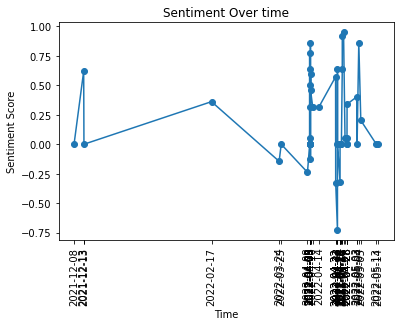

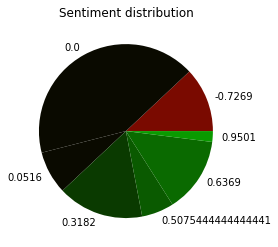

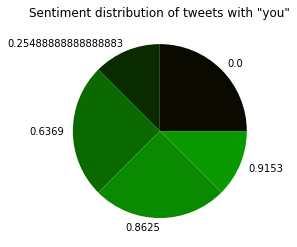

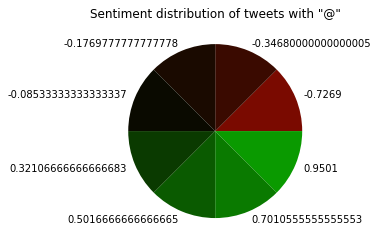

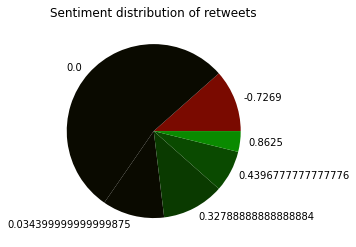

In [83]:
from dateutil import parser
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

#Sort tweet list by date
tweets.sort(key=(lambda x: parser.parse(x['time']).timestamp()))

#Create Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()


def getSentiment(tweets):
  """Convert list of tweets to plot-arguments with sentiment score"""
  xs = []
  ys = []
  xticks = []
  for tweet in tweets:
    xticks.append(parser.parse(tweet['time']).date())
    xs.append(parser.parse(tweet['time']).timestamp())
    ys.append(analyzer.polarity_scores(tweet['text'])['compound'])
  ys = ys[::-1]
  return xs,ys, xticks

#Plot sentiment of tweets over time
xs,ys,my_xticks = getSentiment(tweets)
plt.xticks(xs, my_xticks, rotation=90)
plt.title('Sentiment Over time')
plt.xlabel('Time')
plt.ylabel('Sentiment Score')
plt.plot(xs,ys,'o-')
plt.show()
print()

#plot Pie of sentiment distribution
bins = np.quantile(ys,np.linspace(0,1,10))
inds = np.digitize(ys, bins)
unique,counts = np.unique(inds, return_counts=True)

colors = dict([ [b, '#0A'+str(int(np.floor(b*10))) +'A00' if b > 0 else '#'+str(int(np.floor(abs(b)*10))) +'A0A00'] for b in bins])
plt.pie(counts,labels=bins[unique-1],colors=[colors[key] for key in bins[unique-1]])
plt.title('Sentiment distribution')
plt.show()
print()

#Sentiment of tweets containing a phrase (remove the phrase so phrase doesn't skew results) 

def sentimentOfTweetsWithPhrase(phrase):
  phrase_tweets = [t['text'].replace(phrase,'') for t in tweets if phrase in t['text']]
  ys = [analyzer.polarity_scores(tweet)['compound'] for tweet in phrase_tweets]
  bins = np.quantile(ys,np.linspace(0,1,10))
  inds = np.digitize(ys, bins)
  unique,counts = np.unique(inds, return_counts=True)

  colors = dict([ [b, '#0A'+str(int(np.floor(b*10))) +'A00' if b > 0 else '#'+str(int(np.floor(abs(b)*10))) +'A0A00'] for b in bins])
  plt.pie(counts,labels=bins[unique-1],colors=[colors[key] for key in bins[unique-1]])
  plt.title('Sentiment distribution of tweets with "'+phrase +'"')
  plt.show()
  print()

sentimentOfTweetsWithPhrase('you')
sentimentOfTweetsWithPhrase('@')

#Sentiment Distribution of retweets
xs,ys,my_xticks = getSentiment([t for t in tweets if t['isRetweet']])
bins = np.quantile(ys,np.linspace(0,1,10))
inds = np.digitize(ys, bins)
unique,counts = np.unique(inds, return_counts=True)

colors = dict([ [b, '#0A'+str(int(np.floor(b*10))) +'A00' if b > 0 else '#'+str(int(np.floor(abs(b)*10))) +'A0A00'] for b in bins])
plt.pie(counts,labels=bins[unique-1],colors=[colors[key] for key in bins[unique-1]])
plt.title('Sentiment distribution of retweets')
plt.show()
print()

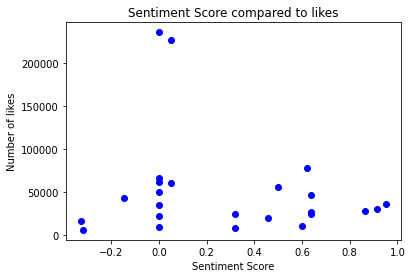

In [84]:
#Sentiment compared to likes
_,xs,_ = getSentiment([ t for t in tweets if not t['isRetweet']])
zs = [ t['likes'] for t in tweets if not t['isRetweet']]
#norm = np.linalg.norm(zs)
#zs = zs/norm
plt.title('Sentiment Score compared to likes')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of likes')
plt.plot(xs,zs,'o',color='blue')
plt.show()
print()